In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd

# Define the generator network
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, input_shape=(100,), activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(3, activation='linear'))  # Adjust output shape for your data
    return model

# Define the discriminator network
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(256, input_shape=(3,), activation='relu'))  # Adjust input shape for your data
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Create generator and discriminator
generator = make_generator_model()
discriminator = make_discriminator_model()

# Define loss functions
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Define optimizer
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Define training steps
@tf.function
def train_step(real_data):
    noise = tf.random.normal([len(real_data), 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_data = generator(noise, training=True)

        real_output = discriminator(real_data, training=True)
        fake_output = discriminator(generated_data, training=True)

        gen_loss = cross_entropy(tf.ones_like(fake_output), fake_output)
        disc_loss_real = cross_entropy(tf.ones_like(real_output), real_output)
        disc_loss_fake = cross_entropy(tf.zeros_like(fake_output), fake_output)
        disc_loss = disc_loss_real + disc_loss_fake

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

# Training loop
def train(dataset, epochs):
    for epoch in range(epochs):
        for data_batch in dataset:
            train_step(data_batch)

# Example usage
# Assuming you have your real data in a Pandas DataFrame named 'real_data'
# Convert real_data to a numpy array if necessary and normalize it

# Assuming real_data has shape (num_samples, num_features)

num_samples = len(real_data)
num_features = len(real_data.columns)
batch_size = 32
epochs = 100

# Create TensorFlow dataset
tf_dataset = tf.data.Dataset.from_tensor_slices(real_data.values).shuffle(num_samples).batch(batch_size)

# Train the GAN
train(tf_dataset, epochs)

In [22]:

real_data = pd.read_csv("/kaggle/input/corona-virus-report/worldometer_data.csv")
real_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [ ]:
import numpy as np
import pandas as pd

# Assuming 'generator' is your trained generator model
# Assuming 'latent_dim' is the dimension of the latent space (input to the generator)
# Assuming 'num_samples' is the number of synthetic data samples you want to generate

# Generate random noise as input to the generator
num_samples = 42
latent_dim = 100
noise = np.random.normal(0, 1, (num_samples, latent_dim))

# Generate synthetic data using the generator
generated_data = generator.predict(noise)

# Convert the generated data into a DataFrame
columns =real_data.columns
generated_df = pd.DataFrame(generated_data, columns=columns)

# Now 'generated_df' contains the synthetic data generated by the GAN, organized into a DataFrame

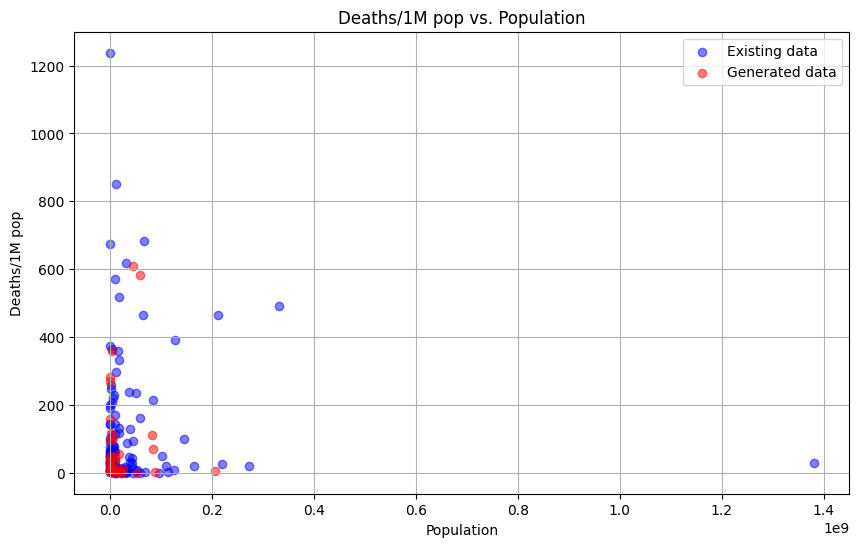

In [20]:
import pandas as pd
import matplotlib.pyplot as plt


feature_column = 'Population'
target_column = 'Deaths/1M pop'

# Plot
plt.figure(figsize=(10, 6))

# Training set
plt.scatter(real_data[feature_column], real_data[target_column], alpha=0.5, color='blue', label='Existing data')

# Testing set
plt.scatter(generated_df[feature_column], generated_df[target_column], alpha=0.5, color='red', label='Generated data')

plt.title(f'{target_column} vs. {feature_column}')
plt.xlabel(feature_column)
plt.ylabel(target_column)
plt.legend()
plt.grid(True)
plt.show()